In [ ]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import types
from botocore.client import Config
import ibm_boto3

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



In [1]:
# The code was removed by Watson Studio for sharing.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [2]:
df_data_neighborhood = df_data_neighborhood.drop(columns=['FacilityCategory','BusinessName','FullAddress','AddrNum','StreetName','StreetType','PostDir','Unit','City','State','County'])

In [3]:
df_data_neighborhood.head(12)

,ZipCode,Neighborhood,Latitude,Longitude
0,55414.0,Marcy Holmes,44.98097,-93.23602
1,55455.0,University of Minnesota,44.97302,-93.23473
2,55402.0,Downtown West,44.97592,-93.27444
3,55402.0,Downtown West,44.97714,-93.27440
4,55408.0,South Uptown,44.94305,-93.29034
5,55403.0,Downtown West,44.97662,-93.27574
6,55404.0,Whittier,44.95633,-93.27747
7,55410.0,Fulton,44.91273,-93.32741
8,55407.0,Ericsson,44.91756,-93.24690
9,55406.0,Linden Hills,44.93433,-93.31729


In [4]:
df_data_neighborhood['ZipCode']

0       55414.0
1       55455.0
2       55402.0
3       55402.0
4       55408.0
5       55403.0
6       55404.0
7       55410.0
8       55407.0
9       55406.0
10          NaN
11      55406.0
12      55417.0
13      55414.0
14      55406.0
15      55418.0
16      55403.0
17      55419.0
18      55407.0
19      55405.0
20      55406.0
21      55413.0
22      55401.0
23      55403.0
24      55401.0
25      55401.0
26      55402.0
27      55404.0
28      55403.0
29      55401.0
         ...   
1731    55401.0
1732    55401.0
1733    55414.0
1734    55408.0
1735    55411.0
1736    55407.0
1737    55401.0
1738    55408.0
1739    55414.0
1740    55401.0
1741    55406.0
1742    55403.0
1743    55405.0
1744    55408.0
1745    55408.0
1746    55403.0
1747    55411.0
1748    55403.0
1749    55408.0
1750    55413.0
1751    55412.0
1752    55454.0
1753    55402.0
1754    55414.0
1755        NaN
1756    55405.0
1757    55413.0
1758    55410.0
1759    55408.0
1760    55413.0
Name: ZipCode, Length: 1

# Dropping the NaN data 

In [5]:
df_data_neighborhood.dropna(inplace=True)
df_data_neighborhood.reset_index(drop=True, inplace=True)


In [6]:
df_data_neighborhood.shape

(1741, 4)

In [7]:
df_data_neighborhood.head(12)

,ZipCode,Neighborhood,Latitude,Longitude
0,55414.0,Marcy Holmes,44.98097,-93.23602
1,55455.0,University of Minnesota,44.97302,-93.23473
2,55402.0,Downtown West,44.97592,-93.27444
3,55402.0,Downtown West,44.97714,-93.27440
4,55408.0,South Uptown,44.94305,-93.29034
5,55403.0,Downtown West,44.97662,-93.27574
6,55404.0,Whittier,44.95633,-93.27747
7,55410.0,Fulton,44.91273,-93.32741
8,55407.0,Ericsson,44.91756,-93.24690
9,55406.0,Linden Hills,44.93433,-93.31729


In [8]:
df_data_neighborhood.tail(20)

,ZipCode,Neighborhood,Latitude,Longitude
1721,55401.0,North Loop,44.98760,-93.27786
1722,55406.0,Cooper,44.94808,-93.21698
1723,55403.0,Downtown West,44.98040,-93.27433
1724,55405.0,Whittier,44.95714,-93.28761
1725,55408.0,Lyndale,44.94715,-93.27727
1726,55408.0,Central,44.94779,-93.26942
1727,55403.0,Loring Park,44.96960,-93.27993
1728,55411.0,Jordan,44.99940,-93.29608
1729,55403.0,Lowry Hill,44.96302,-93.29152
1730,55408.0,Whittier,44.95474,-93.27832


In [9]:

import matplotlib.cm as cm
import matplotlib.colors as colors

# Grouping the data to avoid duplicate zipcodes

In [10]:
df_final = df_data_neighborhood.groupby(['Neighborhood','ZipCode'],as_index=False).mean()

In [11]:
df_final['ZipCode'] =df_final['ZipCode'].astype(int)

In [12]:
df_final.head(143)

,Neighborhood,ZipCode,Latitude,Longitude
0,Armatage,55410,44.901680,-93.318473
1,Armatage,55419,44.901263,-93.308797
2,Audubon Park,55418,45.017782,-93.242893
3,Beltrami,55413,44.998570,-93.241360
4,Beltrami,55414,44.991820,-93.243480
5,Bottineau,55418,45.011262,-93.265803
6,Bryant,55409,44.932950,-93.270500
7,Bryn - Mawr,55405,44.973970,-93.308077
8,Bryn - Mawr,55416,44.967940,-93.326950
9,CARAG,55408,0.000000,0.000000


In [13]:
df_final.head(200)

,Neighborhood,ZipCode,Latitude,Longitude
0,Armatage,55410,44.901680,-93.318473
1,Armatage,55419,44.901263,-93.308797
2,Audubon Park,55418,45.017782,-93.242893
3,Beltrami,55413,44.998570,-93.241360
4,Beltrami,55414,44.991820,-93.243480
5,Bottineau,55418,45.011262,-93.265803
6,Bryant,55409,44.932950,-93.270500
7,Bryn - Mawr,55405,44.973970,-93.308077
8,Bryn - Mawr,55416,44.967940,-93.326950
9,CARAG,55408,0.000000,0.000000


In [28]:
address = 'Minneapolis,MN'
geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Minneapolis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Minneapolis are 44.9772995, -93.2654692.


In [15]:
!conda install -c conda-forge folium=0.5.0
import folium
!pip install folium 
from sklearn.cluster import KMeans



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

# Folium Map - Neighborhood Maping 

In [29]:
map_minneapolis = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, neighborhood in zip (df_final['Latitude'], 
                                            df_final['Longitude'], 
                                            df_final['ZipCode'],
                                            df_final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_minneapolis)  
    
map_minneapolis



In [24]:

CLIENT_ID = '3EPZQ1ERY4KRPYSUSOPN2IVKVVBPEBZ1ZFFKLLTJEM4NS0DJ' 
CLIENT_SECRET = 'DVTOUZVUWS5GG2LNDPDUO0FJ4GJWU3EU5TPXQDOU5NS2ACWL'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3EPZQ1ERY4KRPYSUSOPN2IVKVVBPEBZ1ZFFKLLTJEM4NS0DJ
CLIENT_SECRET:DVTOUZVUWS5GG2LNDPDUO0FJ4GJWU3EU5TPXQDOU5NS2ACWL


In [30]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Below one is exploring the location using API 

In [33]:
import requests  
LIMIT = 100
RADIUS = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            'Restaurant',
            RADIUS,
            LIMIT
            )
            
        # make the GET request
        returns = requests.get(url).json()["response"]
        
        if name == 'CARAG':
          print(returns)
        else:
         results = returns['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
minneapolis_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )


Armatage
Armatage
Audubon Park
Beltrami
Beltrami
Bottineau
Bryant
Bryn - Mawr
Bryn - Mawr
CARAG
{}
Camden Industrial
Cedar - Isles - Dean
Cedar - Isles - Dean
Cedar Riverside
Central
Central
Cleveland
Columbia Park
Como
Como
Cooper
Corcoran
Corcoran
Diamond Lake
Downtown East
Downtown East
Downtown West
Downtown West
Downtown West
Downtown West
Downtown West
Downtown West
Downtown West
Downtown West
ECCO
East Harriet
East Isles
East Isles
East Isles
East Phillips
East Phillips
East Phillips
Elliot Park
Elliot Park
Ericsson
Ericsson
Field
Field
Folwell
Fulton
Fulton
Hale
Harrison
Hawthorne
Hawthorne
Hawthorne
Hiawatha
Hiawatha
Holland
Howe
Jordan
Keewaydin
Kenwood
King Field
King Field
Lind - Bohanon
Lind - Bohanon
Linden Hills
Linden Hills
Logan Park
Logan Park
Longfellow
Loring Park
Lowry Hill
Lowry Hill
Lowry Hill East
Lowry Hill East
Lowry Hill East
Lyndale
Lynnhurst
Marcy Holmes
Marcy Holmes
Marcy Holmes
Marcy Holmes
Marshall Terrace
McKinley
McKinley
McKinley
Mid - City Industrial

In [35]:
#This is to check if the data has any indian restaurants
'Indian Restaurant' in minneapolis_venues['Venue Category'].unique()

True

In [36]:
to_onehot = pd.get_dummies(minneapolis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = minneapolis_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2162, 80)


,Neighborhoods,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Burger Joint,...,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Armatage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Armatage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Armatage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Armatage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Armatage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:

to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(82, 80)


,Neighborhoods,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Burger Joint,...,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Truck Stop,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Armatage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
1,Audubon Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.000000,0.000000
2,Beltrami,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
3,Bottineau,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.142857,0.000000
4,Bryant,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
5,Bryn - Mawr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
6,CARAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
7,Camden Industrial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
8,Cedar - Isles - Dean,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.066667,0.000000,0.000000
9,Cedar Riverside,0.045455,0.045455,0.090909,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.0,0.00,0.045455,0.000000,0.000000


In [39]:
indian_restaurant = to_grouped[["Neighborhoods","Indian Restaurant"]]

In [41]:
indian_restaurant .head()

,Neighborhoods,Indian Restaurant
0,Armatage,0.0
1,Audubon Park,0.0
2,Beltrami,0.0
3,Bottineau,0.0
4,Bryant,0.0


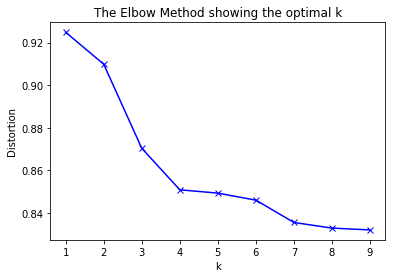

In [40]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
to_clustering = indian_restaurant.drop(["Neighborhoods"], 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(to_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(to_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / to_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [42]:
toclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=0).fit(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4], dtype=int32)

In [43]:
to_merged = indian_restaurant.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [44]:

to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,Armatage,0.0,1
1,Audubon Park,0.0,1
2,Beltrami,0.0,1
3,Bottineau,0.0,1
4,Bryant,0.0,1


In [45]:
to_merged = to_merged.join(minneapolis_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head() 


(2162, 9)


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Armatage,0.0,1,44.901680,-93.318473,Pizzeria Lola,44.901803,-93.318687,Pizza Place
0,Armatage,0.0,1,44.901680,-93.318473,Cavé Vin,44.901868,-93.318634,French Restaurant
0,Armatage,0.0,1,44.901680,-93.318473,Lil Versailles,44.901682,-93.318813,Pizza Place
0,Armatage,0.0,1,44.901263,-93.308797,Red Wagon Pizza Company,44.904620,-93.308751,Pizza Place
0,Armatage,0.0,1,44.901263,-93.308797,Colita,44.904920,-93.309021,Mexican Restaurant


In [46]:

# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2162, 9)


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
18,Downtown West,0.016000,0,44.976320,-93.266250,Great Steak & Potato Company,44.977970,-93.271249,Food Court
59,Phillips West,0.023256,0,44.950011,-93.270494,Pineda Tacos #1,44.948345,-93.272156,Taco Place
59,Phillips West,0.023256,0,44.950011,-93.270494,A & J Fish & Chicken,44.948647,-93.268524,American Restaurant
59,Phillips West,0.023256,0,44.950011,-93.270494,Safari Restaurant & Event Center,44.947902,-93.270518,African Restaurant
59,Phillips West,0.023256,0,44.950011,-93.270494,Taqueria La Hacienda,44.948605,-93.271181,Mexican Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Jack's Bistro,44.952006,-93.269928,American Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Gold Rush Cafe,44.952150,-93.269829,American Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Skyway Cafe,44.954511,-93.260485,Café
59,Phillips West,0.023256,0,44.951143,-93.263753,Moroccan Flavors,44.948664,-93.260683,African Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Fresco's Pasta Bar,44.948823,-93.260627,Italian Restaurant


In [47]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i + x + (i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
#Cluster 0
to_merged.loc[to_merged['Cluster Labels'] == 0]


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
18,Downtown West,0.016000,0,44.976320,-93.266250,Great Steak & Potato Company,44.977970,-93.271249,Food Court
59,Phillips West,0.023256,0,44.950011,-93.270494,Pineda Tacos #1,44.948345,-93.272156,Taco Place
59,Phillips West,0.023256,0,44.950011,-93.270494,A & J Fish & Chicken,44.948647,-93.268524,American Restaurant
59,Phillips West,0.023256,0,44.950011,-93.270494,Safari Restaurant & Event Center,44.947902,-93.270518,African Restaurant
59,Phillips West,0.023256,0,44.950011,-93.270494,Taqueria La Hacienda,44.948605,-93.271181,Mexican Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Jack's Bistro,44.952006,-93.269928,American Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Gold Rush Cafe,44.952150,-93.269829,American Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Skyway Cafe,44.954511,-93.260485,Café
59,Phillips West,0.023256,0,44.951143,-93.263753,Moroccan Flavors,44.948664,-93.260683,African Restaurant
59,Phillips West,0.023256,0,44.951143,-93.263753,Fresco's Pasta Bar,44.948823,-93.260627,Italian Restaurant


In [49]:
#Cluster 1
to_merged.loc[to_merged['Cluster Labels'] == 1]


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
81,Windom Park,0.0,1,45.012970,-93.242920,Khao Hom Thai,45.012621,-93.247085,Thai Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,Adelita's Mexican Restaurant,45.012396,-93.247230,Mexican Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,Crescent Moon Bakery,45.012057,-93.247366,Pizza Place
81,Windom Park,0.0,1,45.012970,-93.242920,Durango Bakery,45.012837,-93.247431,Bakery
81,Windom Park,0.0,1,45.012970,-93.242920,La Colonia Restaurant,45.010097,-93.247182,South American Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,Sen Yai Sen Lek,45.012961,-93.247552,Thai Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,Aki's Bread Haus,45.013571,-93.247518,Bakery
81,Windom Park,0.0,1,45.012970,-93.242920,Karta Thai,45.012618,-93.247257,Thai Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,Holy Land - Northeast,45.013646,-93.247194,Middle Eastern Restaurant
81,Windom Park,0.0,1,45.012970,-93.242920,El Taco Riendo,45.012762,-93.247410,Mexican Restaurant


In [50]:
#Cluster 2
to_merged.loc[to_merged['Cluster Labels'] == 2]


,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
15,Corcoran,0.176471,2,44.969360,-93.250570,Jewel of India,44.973152,-93.247946,Indian Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Flamin Thai Cuisine,44.972714,-93.246950,Thai Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,The Wienery,44.969531,-93.247253,Hot Dog Joint
15,Corcoran,0.176471,2,44.969360,-93.250570,Lucky Dragon,44.969659,-93.246030,Asian Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Chai's Thai Restaurant,44.969600,-93.247163,Asian Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Malabari Kitchen,44.969500,-93.247200,Indian Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Chipotle Mexican Grill,44.972857,-93.247677,Mexican Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Mediterranean Deli,44.968106,-93.247261,Greek Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Malabari,44.969463,-93.247603,Indian Restaurant
15,Corcoran,0.176471,2,44.969360,-93.250570,Hard Times Café,44.969709,-93.246045,Vegetarian / Vegan Restaurant


In [51]:
#Cluster 3
to_merged.loc[to_merged['Cluster Labels'] == 3]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
21,East Isles,0.057143,3,44.958037,-93.295493,Five Guys,44.959763,-93.293866,Burger Joint
41,Longfellow,0.058824,3,44.948380,-93.230799,Lu’s Sandwiches Food Truck,44.944854,-93.233811,Food Truck
64,South Uptown,0.087719,3,44.946065,-93.292230,Sushi Tango,44.947502,-93.297912,Sushi Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,Libertine,44.948459,-93.297450,American Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,Prieto Taqueria Bar,44.948482,-93.288274,Mexican Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,Toppers Pizza,44.948818,-93.288329,Pizza Place
64,South Uptown,0.087719,3,44.946065,-93.292230,Roat Osha,44.947770,-93.297041,Thai Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,B-Dubs Express,44.948170,-93.295392,American Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,Stella's Fish Cafe & Prestige Oyster Bar,44.948591,-93.297216,Seafood Restaurant
64,South Uptown,0.087719,3,44.946065,-93.292230,The Gray House,44.948496,-93.287429,Gastropub


In [52]:
#Cluster 
to_merged.loc[to_merged['Cluster Labels'] == 4]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Jimmy John's,44.968093,-93.242772,Sandwich Place
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Jewel of India,44.973152,-93.247946,Indian Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Papa John's Blegen Hall,44.971840,-93.243307,Pizza Place
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Mediterranean Deli,44.968106,-93.247261,Greek Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Subway,44.971894,-93.243352,Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,The Wienery,44.969531,-93.247253,Hot Dog Joint
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Hard Times Café,44.969709,-93.246045,Vegetarian / Vegan Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Keefer Court,44.970452,-93.247297,Chinese Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Dilla's Ethiopan Restaurant,44.969775,-93.246456,African Restaurant
9,Cedar Riverside,0.136364,4,44.969602,-93.245397,Lucky Dragon,44.969659,-93.246030,Asian Restaurant


In [54]:
to_merged.loc[to_merged['Venue Category'] == 'Indian Restaurant']

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
59,Phillips West,0.023256,0,44.951143,-93.263753,Hot Indian Foods,44.948890,-93.260753,Indian Restaurant
27,Fulton,0.029412,0,44.912374,-93.325531,Raag Progressive Indian Cuisine,44.912792,-93.328270,Indian Restaurant
42,Loring Park,0.032258,0,44.971075,-93.280463,Dancing Ganesha,44.974162,-93.278538,Indian Restaurant
56,North Loop,0.013333,0,44.980437,-93.279637,Bombay Express,44.978152,-93.274492,Indian Restaurant
18,Downtown West,0.016000,0,44.976320,-93.266250,Kadai Indian Kitchen,44.977210,-93.270070,Indian Restaurant
55,Nicollet Island - East Bank,0.030075,0,44.989281,-93.254998,Gorkha Palace,44.989268,-93.255184,Indian Restaurant
55,Nicollet Island - East Bank,0.030075,0,44.987958,-93.255840,Gorkha Palace,44.989268,-93.255184,Indian Restaurant
55,Nicollet Island - East Bank,0.030075,0,44.988460,-93.256847,Gorkha Palace,44.989268,-93.255184,Indian Restaurant
55,Nicollet Island - East Bank,0.030075,0,44.990020,-93.254760,Gorkha Palace,44.989268,-93.255184,Indian Restaurant
51,Midtown Phillips,0.033333,0,44.950038,-93.259465,Hot Indian Foods,44.948890,-93.260753,Indian Restaurant


In [55]:
to_merged.loc[to_merged['Cluster Labels'] == 1].Neighborhood.unique()

array(['Windom Park', 'Windom', 'Whittier', 'Willard - Hay',
       'Ventura Village', 'Victory', 'Waite Park',
       'University of Minnesota', 'Webber - Camden', 'West Calhoun',
       'Wenonah', 'Powderhorn Park', 'Northeast Park', 'Sheridan',
       'St. Anthony East', 'St. Anthony West', 'Standish',
       "Steven's Square - Loring Heights",
       'Prospect Park - East River Road', 'Seward', 'Sumner - Glenwood',
       'Tangletown', 'Northrop', 'Armatage', 'Near - North',
       'East Phillips', 'East Harriet', 'ECCO', 'Downtown East', 'Field',
       'Ericsson', 'Hawthorne', 'Harrison', 'Hale', 'Folwell',
       'Elliot Park', 'Cedar - Isles - Dean', 'Camden Industrial',
       'CARAG', 'Bryn - Mawr', 'Beltrami', 'Audubon Park', 'Bryant',
       'Bottineau', 'Cooper', 'Como', 'Diamond Lake', 'Central',
       'Columbia Park', 'Cleveland', 'Marcy Holmes', 'Marshall Terrace',
       'Lowry Hill', 'Lyndale', 'Logan Park', 'Lynnhurst', 'King Field',
       'Kenwood', 'Keewaydin', '

In [73]:
to_merged.loc[(to_merged['Cluster Labels']== 1) & (to_merged['Venue Category']== 'Indian Restaurant')] 

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
47,Marcy Holmes,0.012195,1,44.98947,-93.2513,Gorkha Palace,44.989268,-93.255184,Indian Restaurant


### Cluster 0 got 19 Indian Restaurants, Cluster 1 got only one Indian Restaurant, Cluster 2 got 3 Indian Restaurants, Cluster 3 got 10 Indian Restaurants and Cluster 4 got 3 Indian Restaurants in the neighborhood. So, as per the project, Cluster 1 is a good place to open a restaurant in the Minneapolis Neighborhood.  